You are given the root of a binary search tree (BST), where the values of exactly two nodes of the tree were swapped by mistake. Recover the tree without changing its structure.

Example 1:

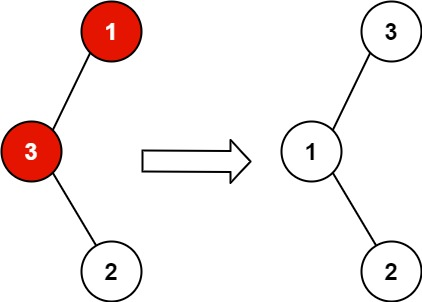

Input: root = [1,3,null,null,2]
Output: [3,1,null,null,2]
Explanation: 3 cannot be a left child of 1 because 3 > 1. Swapping 1 and 3 makes the BST valid.

Example 2:

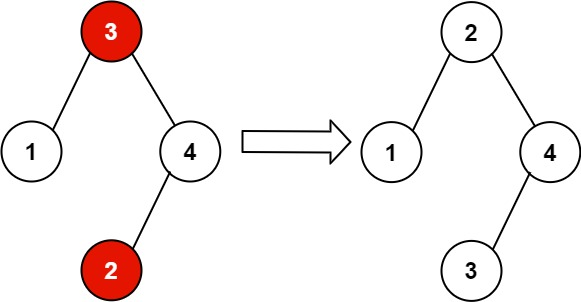

Input: root = [3,1,4,null,null,2]
Output: [2,1,4,null,null,3]
Explanation: 2 cannot be in the right subtree of 3 because 2 < 3. Swapping 2 and 3 makes the BST valid.

 

Constraints:

    The number of nodes in the tree is in the range [2, 1000].
    -231 <= Node.val <= 231 - 1

 
Follow up: A solution using O(n) space is pretty straight-forward. Could you devise a constant O(1) space solution?

In [25]:
from typing import Optional

# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

        
class Solution:
    def recoverTree(self, root: Optional[TreeNode]) -> None:
        """
        Do not return anything, modify root in-place instead.
        """

        if root is None:
            return
        def dfs(node):
            if node.left:
                yield from dfs(node.left)
            yield node
            if node.right:
                yield from dfs(node.right)

        inorder = list(dfs(root))

        sorted_order = sorted([node.val for node in inorder])
        for node, val in zip(inorder, sorted_order):
            if node.val != val:
                node.val = val


In [26]:
s = Solution()
s.recoverTree(TreeNode(1, TreeNode(3, None, TreeNode(2))))

In [27]:
s.recoverTree(TreeNode(3, TreeNode(1), TreeNode(4, TreeNode(2))))

In [28]:
s.recoverTree(TreeNode(2, TreeNode(3), TreeNode(1)))